In [3]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

print("Libraries imported successfully.")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully.
NumPy version: 2.3.5


In [4]:
# Load the data 
male = np.loadtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skiprows=19)
female = np.loadtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skiprows=19)

print(f"Male dataset shape: {male.shape}")
print(f"Female dataset shape: {female.shape}")
print("\nColumn names:")
print("1. Weight (kg)")
print("2. Standing height (cm)")
print("3. Upper arm length (cm)")
print("4. Upper leg length (cm)")
print("5. Arm circumference (cm)")
print("6. Hip circumference (cm)")
print("7. Waist circumference (cm)")

print("\nFirst 3 rows of male data:")
print(male[:3, :])
print("\nFirst 3 rows of female data:")
print(female[:3, :])

Male dataset shape: (4081, 7)
Female dataset shape: (4221, 7)

Column names:
1. Weight (kg)
2. Standing height (cm)
3. Upper arm length (cm)
4. Upper leg length (cm)
5. Arm circumference (cm)
6. Hip circumference (cm)
7. Waist circumference (cm)

First 3 rows of male data:
[[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]]

First 3 rows of female data:
[[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]]


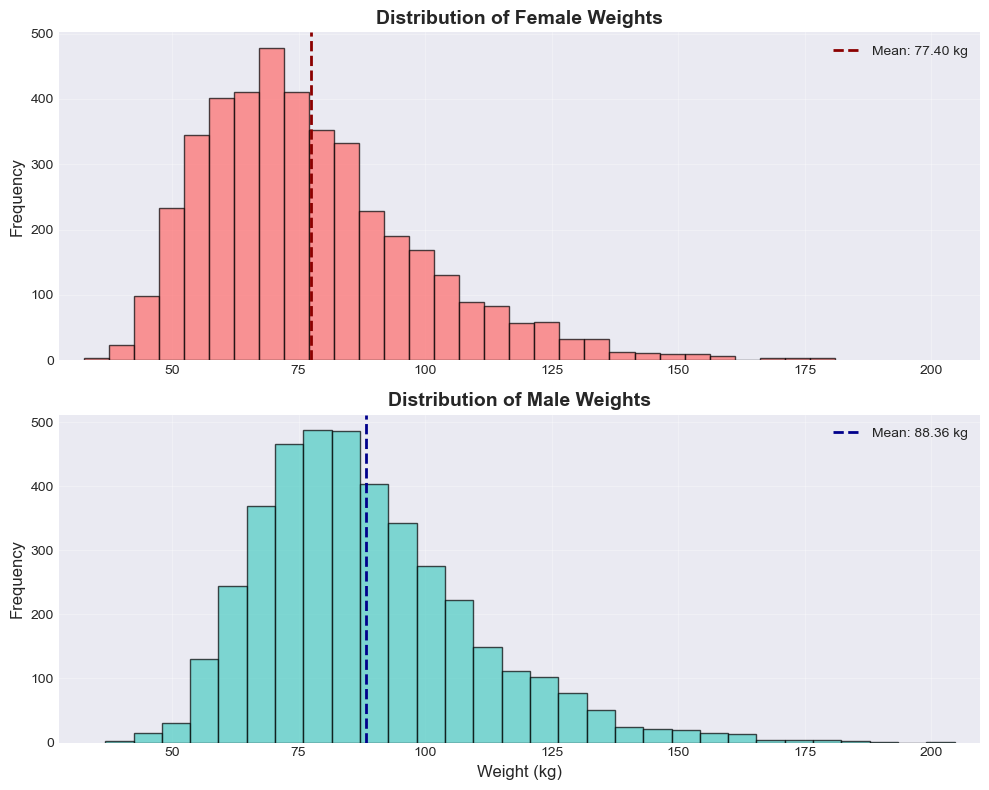

X-axis range: 27.60 to 209.60 kg


In [5]:
#Weight Distribution - Histograms
female_weights = female[:, 0]
male_weights = male[:, 0]

min_weight = min(np.min(female_weights), np.min(male_weights))
max_weight = max(np.max(female_weights), np.max(male_weights))
x_limits = (min_weight - 5, max_weight + 5)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.hist(female_weights, bins=30, color='#FF6B6B', alpha=0.7, edgecolor='black')
ax1.set_title('Distribution of Female Weights', fontsize=14, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_xlim(x_limits)
ax1.grid(True, alpha=0.3)
ax1.axvline(np.mean(female_weights), color='darkred', linestyle='--', 
            linewidth=2, label=f'Mean: {np.mean(female_weights):.2f} kg')
ax1.legend()

ax2.hist(male_weights, bins=30, color='#4ECDC4', alpha=0.7, edgecolor='black')
ax2.set_title('Distribution of Male Weights', fontsize=14, fontweight='bold')
ax2.set_xlabel('Weight (kg)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_xlim(x_limits)
ax2.grid(True, alpha=0.3)
ax2.axvline(np.mean(male_weights), color='darkblue', linestyle='--', 
            linewidth=2, label=f'Mean: {np.mean(male_weights):.2f} kg')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"X-axis range: {x_limits[0]:.2f} to {x_limits[1]:.2f} kg")

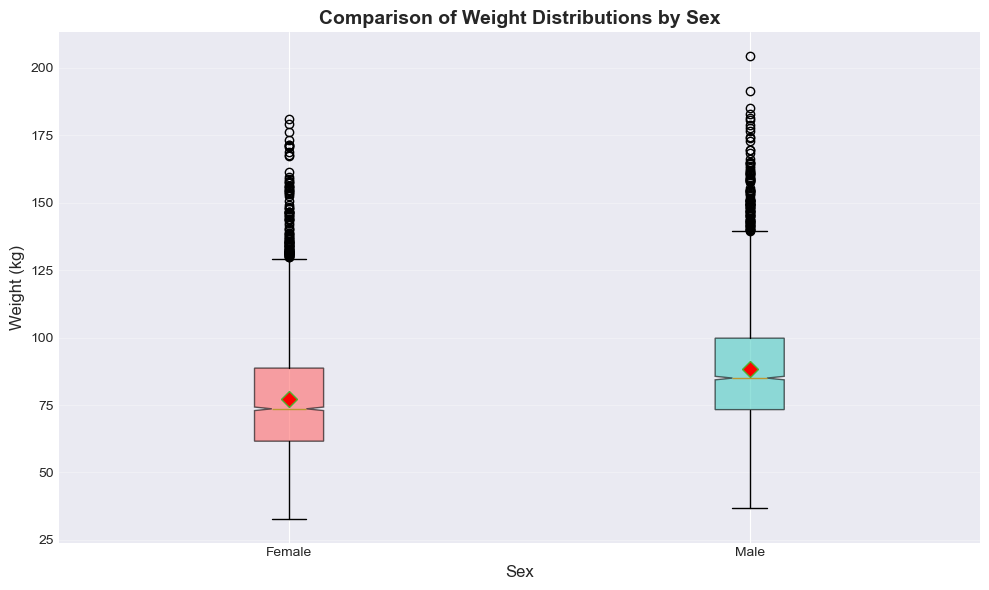


Summary Statistics:

Female Weights:
  Median: 73.60 kg
  Q1 (25th percentile): 61.60 kg
  Q3 (75th percentile): 88.70 kg
  IQR: 27.10 kg

Male Weights:
  Median: 85.00 kg
  Q1 (25th percentile): 73.30 kg
  Q3 (75th percentile): 99.80 kg
  IQR: 26.50 kg


In [6]:
#Weight Distribution - Box Plot
fig, ax = plt.subplots(figsize=(10, 6))

bp = ax.boxplot([female_weights, male_weights], 
                 labels=['Female', 'Male'],
                 patch_artist=True,
                 notch=True,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

colors = ['#FF6B6B', '#4ECDC4']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax.set_title('Comparison of Weight Distributions by Sex', fontsize=14, fontweight='bold')
ax.set_ylabel('Weight (kg)', fontsize=12)
ax.set_xlabel('Sex', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nSummary Statistics:")
print("\nFemale Weights:")
print(f"  Median: {np.median(female_weights):.2f} kg")
print(f"  Q1 (25th percentile): {np.percentile(female_weights, 25):.2f} kg")
print(f"  Q3 (75th percentile): {np.percentile(female_weights, 75):.2f} kg")
print(f"  IQR: {np.percentile(female_weights, 75) - np.percentile(female_weights, 25):.2f} kg")

print("\nMale Weights:")
print(f"  Median: {np.median(male_weights):.2f} kg")
print(f"  Q1 (25th percentile): {np.percentile(male_weights, 25):.2f} kg")
print(f"  Q3 (75th percentile): {np.percentile(male_weights, 75):.2f} kg")
print(f"  IQR: {np.percentile(male_weights, 75) - np.percentile(male_weights, 25):.2f} kg")

In [7]:
#Statistical Function Definition
def compute_statistics(data, label):
    """Compute comprehensive statistical measures for a dataset."""
    print(f"\n{'='*60}")
    print(f"{label} WEIGHT STATISTICS")
    print(f"{'='*60}")
    
    # Measures of Location
    print("\n--- Measures of Location ---")
    mean = np.mean(data)
    median = np.median(data)
    mode_result = stats.mode(data, keepdims=True)
    
    print(f"Mean:              {mean:.4f} kg")
    print(f"Median:            {median:.4f} kg")
    print(f"Mode:              {mode_result.mode[0]:.4f} kg (count: {mode_result.count[0]})")
    
    # Measures of Dispersion
    print("\n--- Measures of Dispersion ---")
    variance = np.var(data, ddof=1)
    std_dev = np.std(data, ddof=1)
    range_val = np.max(data) - np.min(data)
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    coef_var = (std_dev / mean) * 100
    
    print(f"Variance:          {variance:.4f} kg²")
    print(f"Standard Deviation: {std_dev:.4f} kg")
    print(f"Range:             {range_val:.4f} kg")
    print(f"IQR:               {iqr:.4f} kg")
    print(f"Coefficient of Variation: {coef_var:.2f}%")
    
    # Measures of Shape
    print("\n--- Measures of Shape ---")
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    print(f"Skewness:          {skewness:.4f}")
    print(f"Kurtosis:          {kurtosis:.4f}")
    
    # Interpret skewness
    if abs(skewness) < 0.5:
        skew_interp = "approximately symmetric"
    elif skewness > 0.5:
        skew_interp = "right-skewed (positively skewed)"
    else:
        skew_interp = "left-skewed (negatively skewed)"
    
    # Interpret kurtosis
    if abs(kurtosis) < 0.5:
        kurt_interp = "mesokurtic (normal-like tails)"
    elif kurtosis > 0.5:
        kurt_interp = "leptokurtic (heavy tails, more outliers)"
    else:
        kurt_interp = "platykurtic (light tails, fewer outliers)"
    
    print(f"\nInterpretation:")
    print(f"  - Distribution is {skew_interp}")
    print(f"  - Distribution is {kurt_interp}")
    
    # Additional percentiles
    print("\n--- Percentiles ---")
    print(f"Min (0th):         {np.min(data):.4f} kg")
    print(f"10th percentile:   {np.percentile(data, 10):.4f} kg")
    print(f"25th percentile:   {np.percentile(data, 25):.4f} kg")
    print(f"50th percentile:   {median:.4f} kg")
    print(f"75th percentile:   {np.percentile(data, 75):.4f} kg")
    print(f"90th percentile:   {np.percentile(data, 90):.4f} kg")
    print(f"Max (100th):       {np.max(data):.4f} kg")
    
    return {
        'mean': mean, 'median': median, 'std': std_dev,
        'skewness': skewness, 'kurtosis': kurtosis,
        'iqr': iqr, 'cv': coef_var
    }

In [8]:
#Compute Statistics for Both Groups
female_stats = compute_statistics(female_weights, "FEMALE")
male_stats = compute_statistics(male_weights, "MALE")
#Comparative Analysis
print("\n" + "="*70)
print("COMPARATIVE ANALYSIS: FEMALE VS MALE WEIGHT DISTRIBUTIONS")
print("="*70)

print("\n1. CENTRAL TENDENCY:")
mean_diff = male_stats['mean'] - female_stats['mean']
median_diff = np.median(male_weights) - np.median(female_weights)
print(f"   - Males have a higher mean weight by {mean_diff:.2f} kg")
print(f"   - Males have a higher median weight by {median_diff:.2f} kg")

print("\n2. DISPERSION:")
if male_stats['std'] > female_stats['std']:
    print(f"   - Male weights show greater variability (SD: {male_stats['std']:.2f} kg)")
    print(f"     compared to female weights (SD: {female_stats['std']:.2f} kg)")
else:
    print(f"   - Female weights show greater variability (SD: {female_stats['std']:.2f} kg)")
    print(f"     compared to male weights (SD: {male_stats['std']:.2f} kg)")

print(f"   - Coefficient of Variation: Female = {female_stats['cv']:.2f}%, Male = {male_stats['cv']:.2f}%")

print("\n3. DISTRIBUTION SHAPE:")
print(f"   - Female skewness: {female_stats['skewness']:.4f}")
print(f"   - Male skewness: {male_stats['skewness']:.4f}")


FEMALE WEIGHT STATISTICS

--- Measures of Location ---
Mean:              77.4038 kg
Median:            73.6000 kg
Mode:              75.8000 kg (count: 17)

--- Measures of Dispersion ---
Variance:          464.1896 kg²
Standard Deviation: 21.5451 kg
Range:             148.3000 kg
IQR:               27.1000 kg
Coefficient of Variation: 27.83%

--- Measures of Shape ---
Skewness:          1.0334
Kurtosis:          1.4010

Interpretation:
  - Distribution is right-skewed (positively skewed)
  - Distribution is leptokurtic (heavy tails, more outliers)

--- Percentiles ---
Min (0th):         32.6000 kg
10th percentile:   53.4000 kg
25th percentile:   61.6000 kg
50th percentile:   73.6000 kg
75th percentile:   88.7000 kg
90th percentile:   106.3000 kg
Max (100th):       180.9000 kg

MALE WEIGHT STATISTICS

--- Measures of Location ---
Mean:              88.3645 kg
Median:            85.0000 kg
Mode:              79.0000 kg (count: 16)

--- Measures of Dispersion ---
Variance:          458

In [9]:
#Add BMI Column to Female Dataset
female_weight = female[:, 0]  # kg
female_height = female[:, 1]  # cm
female_height_m = female_height / 100  # convert to meters
female_bmi = female_weight / (female_height_m ** 2)

# Add BMI as new column
female = np.column_stack((female, female_bmi))

print("BMI column successfully added to female dataset.")
print(f"Updated female dataset shape: {female.shape}")

print("\nBMI Statistics:")
print(f"  Mean BMI: {np.mean(female_bmi):.2f} kg/m²")
print(f"  Median BMI: {np.median(female_bmi):.2f} kg/m²")
print(f"  Min BMI: {np.min(female_bmi):.2f} kg/m²")
print(f"  Max BMI: {np.max(female_bmi):.2f} kg/m²")
print(f"  Std Dev: {np.std(female_bmi, ddof=1):.2f} kg/m²")

print("\nFirst 5 rows with BMI:")
print(female[:5, :])

BMI column successfully added to female dataset.
Updated female dataset shape: (4221, 8)

BMI Statistics:
  Mean BMI: 30.10 kg/m²
  Median BMI: 28.89 kg/m²
  Min BMI: 14.20 kg/m²
  Max BMI: 67.04 kg/m²
  Std Dev: 7.76 kg/m²

First 5 rows with BMI:
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]]


In [10]:
#Standardization Function
def standardize_columns(data):
    """Standardize each column by computing z-scores."""
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0, ddof=1)
    z_scores = (data - means) / stds
    return z_scores

zfemale = standardize_columns(female)

print("Standardized female dataset (zfemale) created successfully.")
print(f"Shape: {zfemale.shape}")

print("\nVerification of standardization:")
print("\nColumn-wise means (should be ≈ 0):")
means = np.mean(zfemale, axis=0)
for i, mean in enumerate(means):
    print(f"  Column {i+1}: {mean:.10f}")

print("\nColumn-wise standard deviations (should be ≈ 1):")
stds = np.std(zfemale, axis=0, ddof=1)
for i, std in enumerate(stds):
    print(f"  Column {i+1}: {std:.10f}")

Standardized female dataset (zfemale) created successfully.
Shape: (4221, 8)

Verification of standardization:

Column-wise means (should be ≈ 0):
  Column 1: 0.0000000000
  Column 2: 0.0000000000
  Column 3: -0.0000000000
  Column 4: -0.0000000000
  Column 5: 0.0000000000
  Column 6: -0.0000000000
  Column 7: 0.0000000000
  Column 8: -0.0000000000

Column-wise standard deviations (should be ≈ 1):
  Column 1: 1.0000000000
  Column 2: 1.0000000000
  Column 3: 1.0000000000
  Column 4: 1.0000000000
  Column 5: 1.0000000000
  Column 6: 1.0000000000
  Column 7: 1.0000000000
  Column 8: 1.0000000000


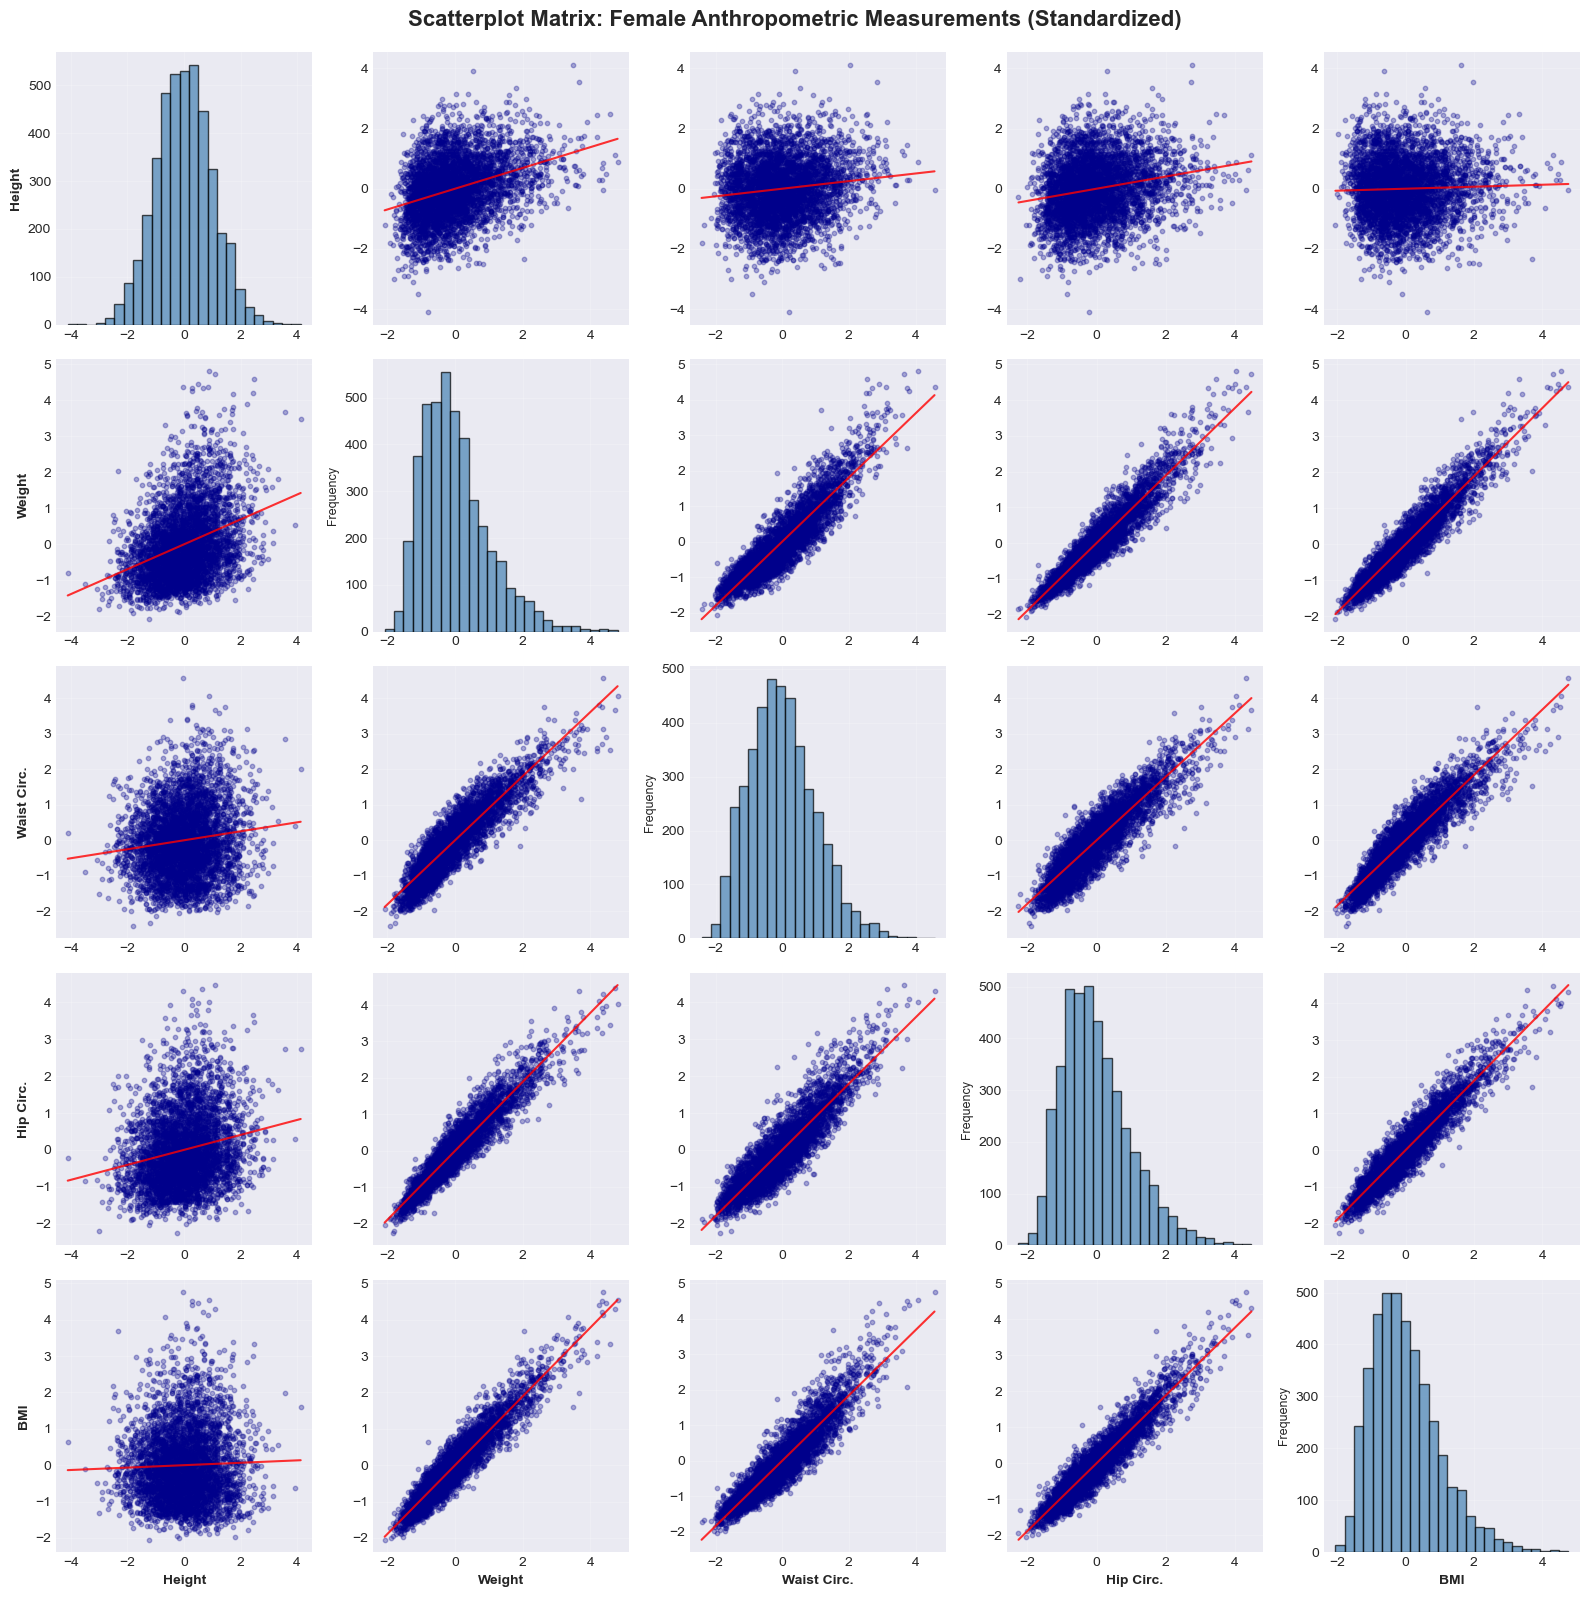

In [11]:
#Scatterplot Matrix
selected_vars = zfemale[:, [1, 0, 6, 5, 7]]
var_names = ['Height', 'Weight', 'Waist Circ.', 'Hip Circ.', 'BMI']

# Create scatterplot matrix
fig, axes = plt.subplots(5, 5, figsize=(16, 16))
fig.suptitle('Scatterplot Matrix: Female Anthropometric Measurements (Standardized)', 
             fontsize=16, fontweight='bold', y=0.995)

for i in range(5):
    for j in range(5):
        ax = axes[i, j]
        
        if i == j:
            # Diagonal: histograms
            ax.hist(selected_vars[:, i], bins=25, color='steelblue', alpha=0.7, edgecolor='black')
            ax.set_ylabel('Frequency', fontsize=9)
        else:
            # Off-diagonal: scatterplots
            ax.scatter(selected_vars[:, j], selected_vars[:, i], 
                      alpha=0.3, s=10, color='darkblue')
            
            # Add regression line
            z = np.polyfit(selected_vars[:, j], selected_vars[:, i], 1)
            p = np.poly1d(z)
            x_line = np.linspace(selected_vars[:, j].min(), selected_vars[:, j].max(), 100)
            ax.plot(x_line, p(x_line), "r-", alpha=0.8, linewidth=1.5)
        
        # Labels
        if i == 4:
            ax.set_xlabel(var_names[j], fontsize=10, fontweight='bold')
        if j == 0:
            ax.set_ylabel(var_names[i], fontsize=10, fontweight='bold')
        
        ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

In [12]:
#Correlation Analysis
print("\n" + "="*70)
print("CORRELATION ANALYSIS")
print("="*70)

pearson_corr = np.corrcoef(selected_vars.T)
from scipy.stats import spearmanr
spearman_corr, _ = spearmanr(selected_vars)

print("\nPEARSON'S CORRELATION MATRIX (Linear Correlation):")
print("\n" + " "*15 + "  ".join([f"{name:>12}" for name in var_names]))
for i, name in enumerate(var_names):
    print(f"{name:>15}", end="")
    for j in range(5):
        print(f"  {pearson_corr[i, j]:>12.4f}", end="")
    print()

print("\n\nSPEARMAN'S CORRELATION MATRIX (Rank Correlation):")
print("\n" + " "*15 + "  ".join([f"{name:>12}" for name in var_names]))
for i, name in enumerate(var_names):
    print(f"{name:>15}", end="")
    for j in range(5):
        print(f"  {spearman_corr[i, j]:>12.4f}", end="")
    print()


CORRELATION ANALYSIS

PEARSON'S CORRELATION MATRIX (Linear Correlation):

                     Height        Weight   Waist Circ.     Hip Circ.           BMI
         Height        1.0000        0.3455        0.1265        0.2029        0.0331
         Weight        0.3455        1.0000        0.9046        0.9466        0.9459
    Waist Circ.        0.1265        0.9046        1.0000        0.8974        0.9212
      Hip Circ.        0.2029        0.9466        0.8974        1.0000        0.9442
            BMI        0.0331        0.9459        0.9212        0.9442        1.0000


SPEARMAN'S CORRELATION MATRIX (Rank Correlation):

                     Height        Weight   Waist Circ.     Hip Circ.           BMI
         Height        1.0000        0.3389        0.1086        0.2054        0.0199
         Weight        0.3389        1.0000        0.9002        0.9466        0.9380
    Waist Circ.        0.1086        0.9002        1.0000        0.8880        0.9231
      Hip Circ. 

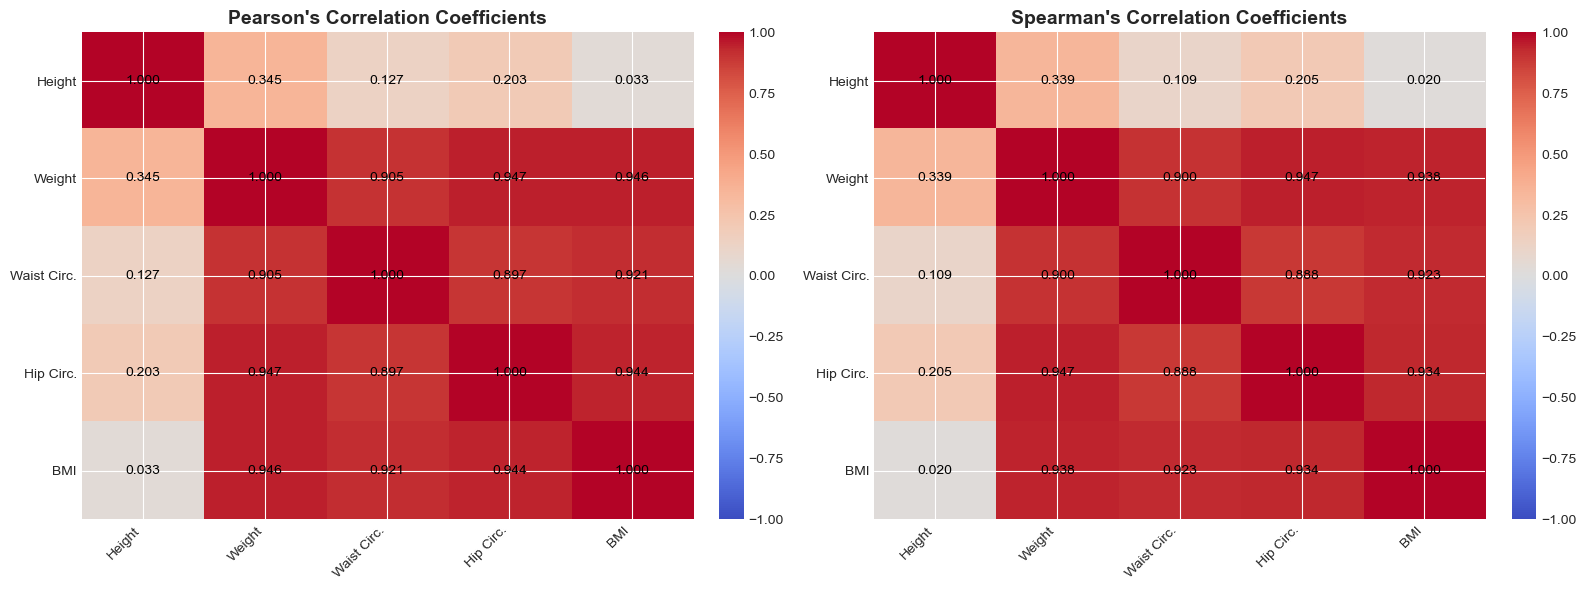

In [13]:
#Correlation Heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pearson heatmap
im1 = ax1.imshow(pearson_corr, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax1.set_xticks(range(5))
ax1.set_yticks(range(5))
ax1.set_xticklabels(var_names, rotation=45, ha='right')
ax1.set_yticklabels(var_names)
ax1.set_title("Pearson's Correlation Coefficients", fontsize=14, fontweight='bold')

for i in range(5):
    for j in range(5):
        text = ax1.text(j, i, f'{pearson_corr[i, j]:.3f}',
                       ha="center", va="center", color="black", fontsize=10)

plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# Spearman heatmap
im2 = ax2.imshow(spearman_corr, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax2.set_xticks(range(5))
ax2.set_yticks(range(5))
ax2.set_xticklabels(var_names, rotation=45, ha='right')
ax2.set_yticklabels(var_names)
ax2.set_title("Spearman's Correlation Coefficients", fontsize=14, fontweight='bold')

for i in range(5):
    for j in range(5):
        text = ax2.text(j, i, f'{spearman_corr[i, j]:.3f}',
                       ha="center", va="center", color="black", fontsize=10)

plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


In [14]:
#Compute Anthropometric Ratios
female_height = female[:, 1]  # cm
female_waist = female[:, 6]   # cm
female_hip = female[:, 5]     # cm

female_whtr = female_waist / female_height  # Waist-to-Height Ratio
female_whr = female_waist / female_hip      # Waist-to-Hip Ratio

female = np.column_stack((female, female_whtr, female_whr))

# For MALE dataset
male_height = male[:, 1]  # cm
male_waist = male[:, 6]   # cm
male_hip = male[:, 5]     # cm

male_whtr = male_waist / male_height  # Waist-to-Height Ratio
male_whr = male_waist / male_hip      # Waist-to-Hip Ratio

male = np.column_stack((male, male_whtr, male_whr))

print("Ratios successfully added to both datasets.")
print(f"Female dataset shape: {female.shape}")
print(f"Male dataset shape: {male.shape}")

print("\nFemale Waist-to-Height Ratio (WHtR) Statistics:")
print(f"  Mean: {np.mean(female_whtr):.4f}")
print(f"  Median: {np.median(female_whtr):.4f}")
print(f"  Std Dev: {np.std(female_whtr, ddof=1):.4f}")

print("\nFemale Waist-to-Hip Ratio (WHR) Statistics:")
print(f"  Mean: {np.mean(female_whr):.4f}")
print(f"  Median: {np.median(female_whr):.4f}")
print(f"  Std Dev: {np.std(female_whr, ddof=1):.4f}")

print("\nMale Waist-to-Height Ratio (WHtR) Statistics:")
print(f"  Mean: {np.mean(male_whtr):.4f}")
print(f"  Median: {np.median(male_whtr):.4f}")
print(f"  Std Dev: {np.std(male_whtr, ddof=1):.4f}")

print("\nMale Waist-to-Hip Ratio (WHR) Statistics:")
print(f"  Mean: {np.mean(male_whr):.4f}")
print(f"  Median: {np.median(male_whr):.4f}")
print(f"  Std Dev: {np.std(male_whr, ddof=1):.4f}")

Ratios successfully added to both datasets.
Female dataset shape: (4221, 10)
Male dataset shape: (4081, 9)

Female Waist-to-Height Ratio (WHtR) Statistics:
  Mean: 0.6156
  Median: 0.6097
  Std Dev: 0.1080

Female Waist-to-Hip Ratio (WHR) Statistics:
  Mean: 0.9000
  Median: 0.9029
  Std Dev: 0.0723

Male Waist-to-Height Ratio (WHtR) Statistics:
  Mean: 0.5860
  Median: 0.5819
  Std Dev: 0.0937

Male Waist-to-Hip Ratio (WHR) Statistics:
  Mean: 0.9708
  Median: 0.9767
  Std Dev: 0.0773


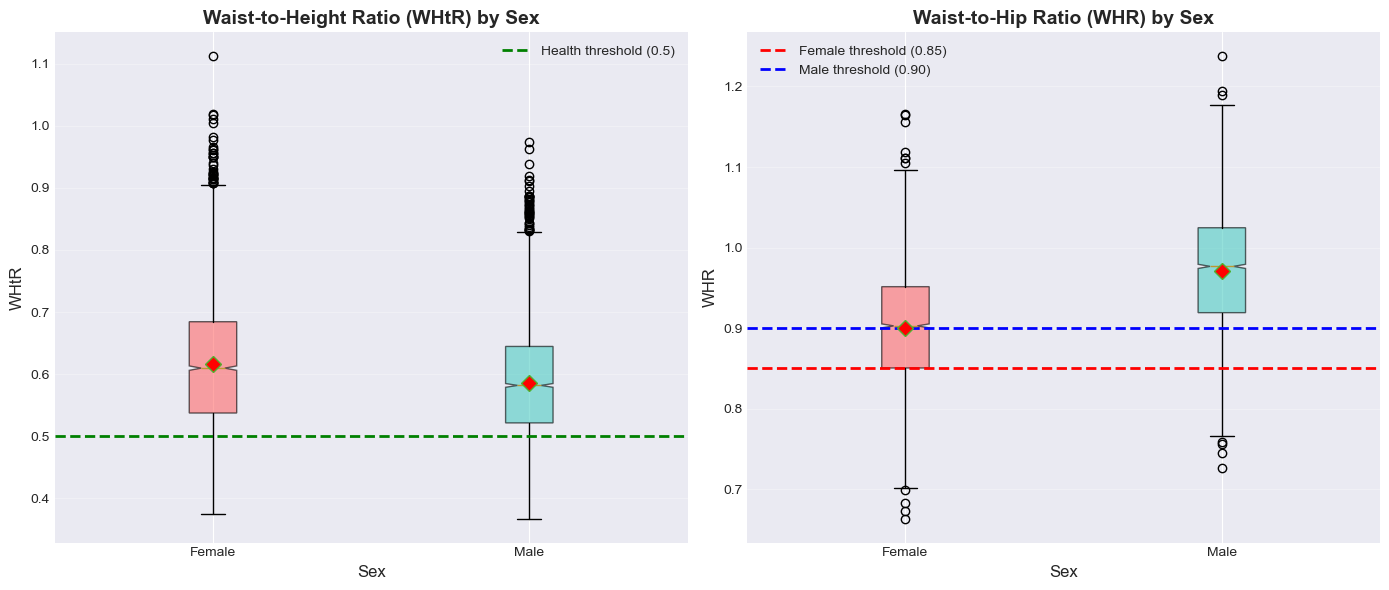

In [15]:
#Anthropometric Ratios Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# WHtR box plot
bp1 = ax1.boxplot([female_whtr, male_whtr], 
                   labels=['Female', 'Male'],
                   patch_artist=True,
                   notch=True,
                   showmeans=True,
                   meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

colors = ['#FF6B6B', '#4ECDC4']
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax1.axhline(y=0.5, color='green', linestyle='--', linewidth=2, label='Health threshold (0.5)')
ax1.set_title('Waist-to-Height Ratio (WHtR) by Sex', fontsize=14, fontweight='bold')
ax1.set_ylabel('WHtR', fontsize=12)
ax1.set_xlabel('Sex', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')
ax1.legend()

# WHR box plot
bp2 = ax2.boxplot([female_whr, male_whr], 
                   labels=['Female', 'Male'],
                   patch_artist=True,
                   notch=True,
                   showmeans=True,
                   meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax2.axhline(y=0.85, color='red', linestyle='--', linewidth=2, label='Female threshold (0.85)')
ax2.axhline(y=0.90, color='blue', linestyle='--', linewidth=2, label='Male threshold (0.90)')
ax2.set_title('Waist-to-Hip Ratio (WHR) by Sex', fontsize=14, fontweight='bold')
ax2.set_ylabel('WHR', fontsize=12)
ax2.set_xlabel('Sex', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')
ax2.legend()

plt.tight_layout()
plt.show()


In [16]:
# Health Risk Assessment
#Calculate percentages exceeding health thresholds
female_whtr_high = np.sum(female_whtr > 0.5) / len(female_whtr) * 100
male_whtr_high = np.sum(male_whtr > 0.5) / len(male_whtr) * 100
female_whr_high = np.sum(female_whr > 0.85) / len(female_whr) * 100
male_whr_high = np.sum(male_whr > 0.90) / len(male_whr) * 100

print("Health Risk Assessment:")
print(f"  Females with WHtR > 0.5: {female_whtr_high:.2f}%")
print(f"  Males with WHtR > 0.5: {male_whtr_high:.2f}%")
print(f"  Females with WHR > 0.85: {female_whr_high:.2f}%")
print(f"  Males with WHR > 0.90: {male_whr_high:.2f}%")

Health Risk Assessment:
  Females with WHtR > 0.5: 84.60%
  Males with WHtR > 0.5: 81.70%
  Females with WHR > 0.85: 75.20%
  Males with WHR > 0.90: 80.54%
